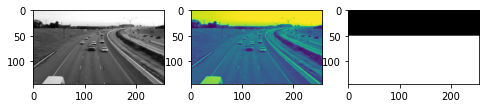

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(8,8))
img = cv.imread('/content/drive/MyDrive/vision/frames/0.png')
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ax[0].imshow(img_gray, cmap='gray')
ax[1].imshow(img_gray)
mask = np.zeros_like(img_gray)
mask[50:,:] = 1
ax[2].imshow(mask, cmap='gray')

# Shi Tomasi

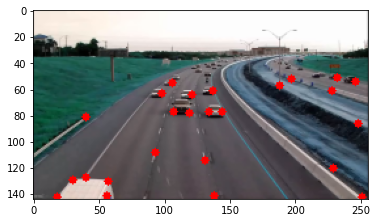

(<matplotlib.image.AxesImage at 0x7f29ea735278>, None)

In [5]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray[50:,:],25,0.01,10)
corners = np.int0(corners)
for i in corners:
    i[0][1] += 50
    x,y = i.ravel()
    cv.circle(img,(x,y),3,255,-1)
plt.imshow(img),plt.show()

# FAST

Threshold:  80
nonmaxSuppression:  True
neighborhood:  2
Total Keypoints with nonmaxSuppression:  16
Total Keypoints without nonmaxSuppression:  26


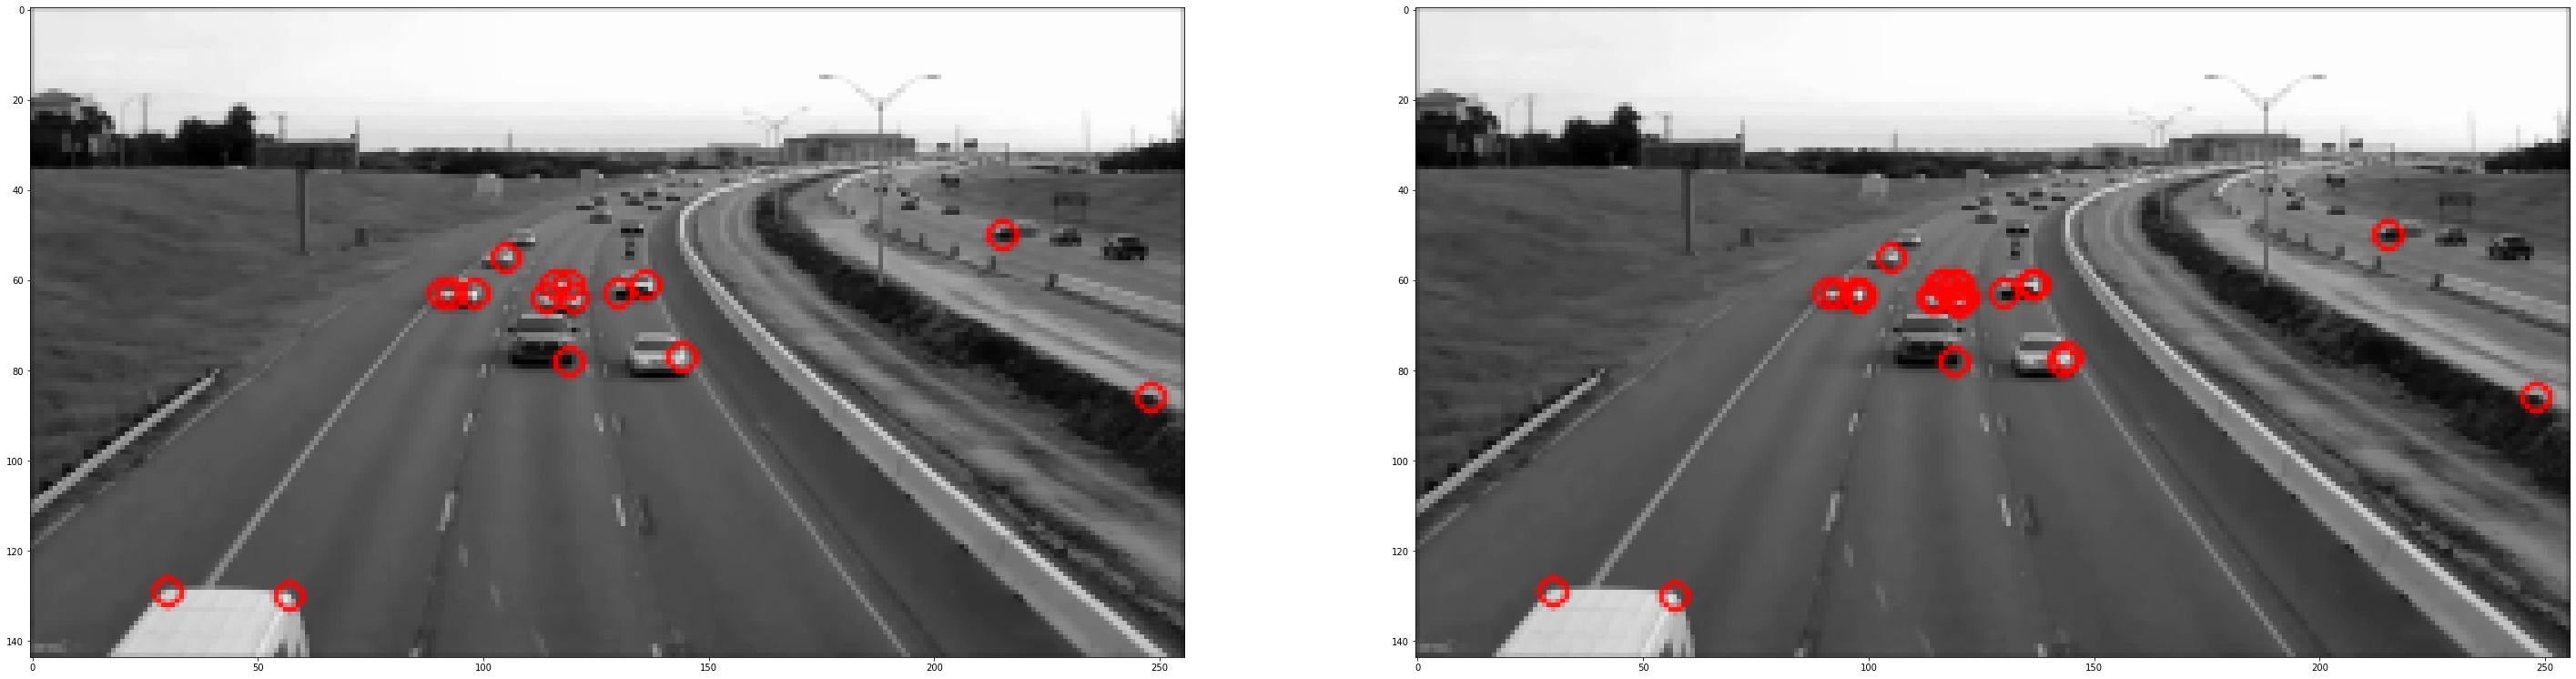

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(50, 50))
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create(80, True, 2)

# find and draw the keypoints

kp = fast.detect(img,mask)
img2 = cv.drawKeypoints(img, kp, img2, color=(255,0,0))

# Print all default params
print("Threshold: ", fast.getThreshold())
print ("nonmaxSuppression: ", fast.getNonmaxSuppression())
print ("neighborhood: ", fast.getType())
print ("Total Keypoints with nonmaxSuppression: ", len(kp))

ax[0].imshow(img2)

# Disable nonmaxSuppression
fast.setNonmaxSuppression(False)
kp = fast.detect(img,mask)

print( "Total Keypoints without nonmaxSuppression: ", len(kp))

img3 = img[...]
img3 = cv.drawKeypoints(img, kp, img3, color=(255,0,0))

ax[1].imshow(img3)

# STAR/censure detector with BRIEF descriptors

32
(3, 32)


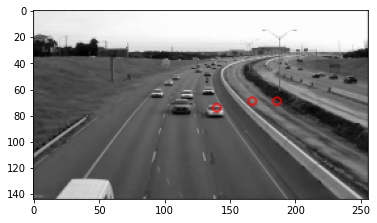

In [ ]:
# Initiate STAR detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,mask)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print( brief.descriptorSize() )
print( des.shape )
starKeypoints = cv.drawKeypoints(img, kp, None, color=(255,0,0))
plt.imshow(starKeypoints)

# ORB

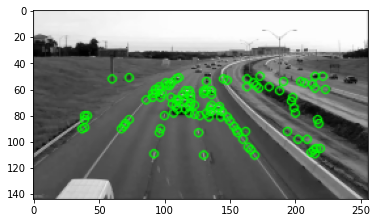

(<matplotlib.image.AxesImage at 0x7f1be98b87f0>, None)

In [ ]:
# Initiate STAR detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,mask)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img,kp,None,color=(0,255,0), flags=0)
plt.imshow(img2),plt.show()